Problem 2
---

In [24]:
from qiskit import *
from math import *
import random

In [26]:
def _equ2(qc, simulator = BasicAer.get_backend('qasm_simulator'), shots = 8000):
    circuit = qc.copy() # to keep circuit unchanged
    circuit.measure([0], [0])
    circuit.measure([1], [1])

    job = execute(circuit, simulator, shots = shots)
    result = job.result().get_counts(circuit)
        
    p1 = result['00'] + result['01']
    p1 /= shots
    p2 = result['00'] + result['10']
    p2 /= shots
    
    print(result)

    print(p1, "is probabilities of 0 state 0 qubit")
    print(p2, "is probabilities of 0 state 1 qubit")
    print(abs(p1 - p2) / max(p1, p2), "is rel error of proposed scheme")
    return {p1, p2}

def calc_phi(res, theta):
    return acos((2. * res - 1.) / sin(2. * (theta)))

In [27]:
IBMQ.load_account()

C:\_N\anaconda\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-09-25 07:39:30,810: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
my_provider = IBMQ.get_provider()

In [29]:
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [30]:
theta = pi / 3
phi = random.random() * pi

backend_cloud = my_provider.get_backend('ibmq_ourense')
backend_local = Aer.get_backend('qasm_simulator')

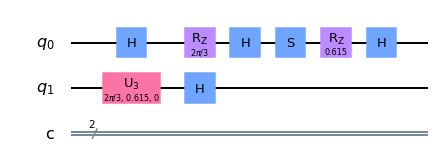

In [31]:

qc2.draw('mpl')

$\newcommand{\Ket}[1]{\left|#1\right>}$
$\newcommand{\Bra}[1]{\left<#1\right|}$

$ H = \frac {1} {\sqrt2} \begin{bmatrix}1&1\\1&-1\end{bmatrix} $
Proposed circuit is: $ H R_z(2\theta) H S R_z(\phi) $

*Proof.*: $$HR_z(2\theta) H S R_z(\phi) \Ket{0} =
\frac {1} {2}
\begin{bmatrix} e^{-i\phi/2} & 0  \\
                0 & e^{i\phi/2}   \end{bmatrix}
\begin{bmatrix} 1 & 0  \\
                0 & i  \end{bmatrix}
\begin{bmatrix} 1 &  1 \\
                1 & -1 \end{bmatrix}
\begin{bmatrix} e^{-i\theta} & 0  \\
                0 & e^{i\theta}   \end{bmatrix}
\begin{bmatrix} 1 &  1 \\
                1 & -1 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} = $$
$$=
\frac {1} {2}
\begin{bmatrix} e^{-i\phi/2} & 0  \\
                0 & e^{i\phi/2}   \end{bmatrix}
\begin{bmatrix} 1 & 0  \\
                0 & i  \end{bmatrix}
\begin{bmatrix} 1 &  1 \\
                1 & -1 \end{bmatrix}
\begin{bmatrix} e^{-i\theta} & 0  \\
                0 & e^{i\theta}   \end{bmatrix}
\begin{bmatrix} 1 \\ 1 \end{bmatrix} = $$
$$=
\frac {1} {2}
\begin{bmatrix} e^{-i\phi/2} & 0  \\
                0 & e^{i\phi/2}   \end{bmatrix}
\begin{bmatrix} 1 & 0  \\
                0 & i  \end{bmatrix}
\begin{bmatrix} e^{-i\theta} + e^{i\theta}  \\
                e^{-i\theta} - e^{i\theta}  \end{bmatrix} = 
\begin{bmatrix} e^{-i\phi/2} & 0  \\
                0 & e^{i\phi/2}   \end{bmatrix}
\begin{bmatrix} \cos{\theta}  \\
                \sin{\theta}  \end{bmatrix} = $$
$$=
\begin{bmatrix} e^{-i\phi/2} & 0  \\
                0 & e^{i\phi/2}   \end{bmatrix}
\begin{bmatrix} \cos{\theta}  \\
                \sin{\theta}  \end{bmatrix} = e^{-i\phi/2}\cos{\theta}\Ket{0} + e^{i\phi/2}\sin{\theta}\Ket{1}$$
That state is equivalent to 
$ \cos{\theta}\Ket{0} + e^{i\phi}\sin{\theta}\Ket{1}$

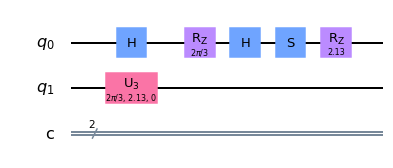

In [32]:
qc2 = QuantumCircuit(2,2) # Create a quantum circuit with one qubit

qc2.h(0)
qc2.rz(2*theta, 0)
qc2.h(0)
qc2.s(0)
qc2.rz(phi, 0)

qc2.u3(2*theta, phi, 0, 1)
qc2.draw('mpl')

In [33]:
_equ2(qc2, backend_local)

{'00': 478, '01': 1470, '10': 1478, '11': 4574}
0.2435 is probabilities of 0 state 0 qubit
0.2445 is probabilities of 0 state 1 qubit
0.004089979550102253 is rel error of proposed scheme


{0.2435, 0.2445}

In [34]:
_equ2(qc2, backend_cloud, 1024)

{'00': 121, '01': 270, '10': 172, '11': 461}
0.3818359375 is probabilities of 0 state 0 qubit
0.2861328125 is probabilities of 0 state 1 qubit
0.2506393861892583 is rel error of proposed scheme


{0.2861328125, 0.3818359375}

In [23]:
qc2.h(0)
qc2.h(1)

_equ2(qc2, backend_local)
_equ2(qc2, backend_cloud)

{'00': 7349, '01': 1222, '10': 1236, '11': 193}
0.8571 is probabilities of 0 state 0 qubit
0.8585 is probabilities of 0 state 1 qubit
0.001630751310425239 is rel error of proposed scheme
